In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("data.csv")


In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,565.000000,564.000000,562.000000,565.000000,568.000000,563.000000,567.000000,565.000000,567.000000,...,567.000000,569.000000,569.000000,569.000000,569.000000,568.000000,567.000000,569.000000,567.000000,569.000000
mean,3.037183e+07,14.121096,19.306897,91.908025,654.507788,0.096370,0.103831,0.088699,0.048693,0.181241,...,16.280439,25.677223,107.261213,880.583128,0.132369,0.254355,0.271792,0.114606,0.289831,0.083946
std,1.250206e+08,3.529702,4.308665,24.069691,351.301417,0.014075,0.052418,0.079637,0.038684,0.027430,...,4.837564,6.146258,33.602542,569.356993,0.022832,0.157460,0.208515,0.065732,0.061503,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.177500,75.180000,420.300000,0.086290,0.064710,0.029570,0.020310,0.162000,...,13.020000,21.080000,84.110000,515.300000,0.116600,0.146900,0.114450,0.064930,0.250300,0.071460
50%,9.060240e+05,13.340000,18.855000,86.210000,551.100000,0.095895,0.092280,0.061540,0.033340,0.179300,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.213000,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.812500,104.025000,782.700000,0.105325,0.130100,0.130000,0.073640,0.195700,...,18.800000,29.720000,125.400000,1084.000000,0.146000,0.339300,0.381900,0.161400,0.317750,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                565 non-null float64
texture_mean               564 non-null float64
perimeter_mean             562 non-null float64
area_mean                  565 non-null float64
smoothness_mean            568 non-null float64
compactness_mean           563 non-null float64
concavity_mean             567 non-null float64
concave points_mean        565 non-null float64
symmetry_mean              567 non-null float64
fractal_dimension_mean     565 non-null float64
radius_se                  567 non-null float64
texture_se                 563 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              567 non-null float64
compactness_se             568 non-null float64
concavity_se               568 non

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                4
texture_mean               5
perimeter_mean             7
area_mean                  4
smoothness_mean            1
compactness_mean           6
concavity_mean             2
concave points_mean        4
symmetry_mean              2
fractal_dimension_mean     4
radius_se                  2
texture_se                 6
perimeter_se               0
area_se                    0
smoothness_se              2
compactness_se             1
concavity_se               1
concave points_se          3
symmetry_se                0
fractal_dimension_se       0
radius_worst               2
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          1
concavity_worst            2
concave points_worst       0
symmetry_worst             2
fractal_dimension_worst    0
dtype: int64

In [8]:
df.mean()

id                         3.037183e+07
radius_mean                1.412110e+01
texture_mean               1.930690e+01
perimeter_mean             9.190802e+01
area_mean                  6.545078e+02
smoothness_mean            9.636995e-02
compactness_mean           1.038310e-01
concavity_mean             8.869919e-02
concave points_mean        4.869312e-02
symmetry_mean              1.812409e-01
fractal_dimension_mean     6.281124e-02
radius_se                  4.054316e-01
texture_se                 1.215982e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.050628e-03
compactness_se             2.550718e-02
concavity_se               3.189686e-02
concave points_se          1.181998e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.628044e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [9]:
df=df.fillna(df.mean())
df=df.dropna()

In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))

In [12]:
df.drop('id',axis=1,inplace=True)
 #df.drop('Unnamed: 32',axis=1,inplace=True)

In [13]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,14.121096,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.570000,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.690000,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.420000,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.290000,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
print(df.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.121096     19.306897       91.908025   654.507788   
std      0.483918     3.517251      4.289659       23.920915   350.062254   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.710000     16.210000       75.260000   420.300000   
50%      0.000000    13.380000     18.890000       86.870000   552.400000   
75%      1.000000    15.750000     21.800000      103.700000   782.600000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096370          0.103831        0.088699             0.048693   
std           0.014062          0.052140        0.079497       

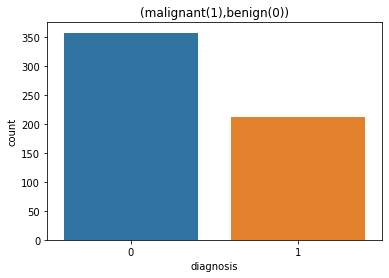

In [15]:
sns.countplot(df['diagnosis'],label="Count")
plt.title('(malignant(1),benign(0))')
plt.show()

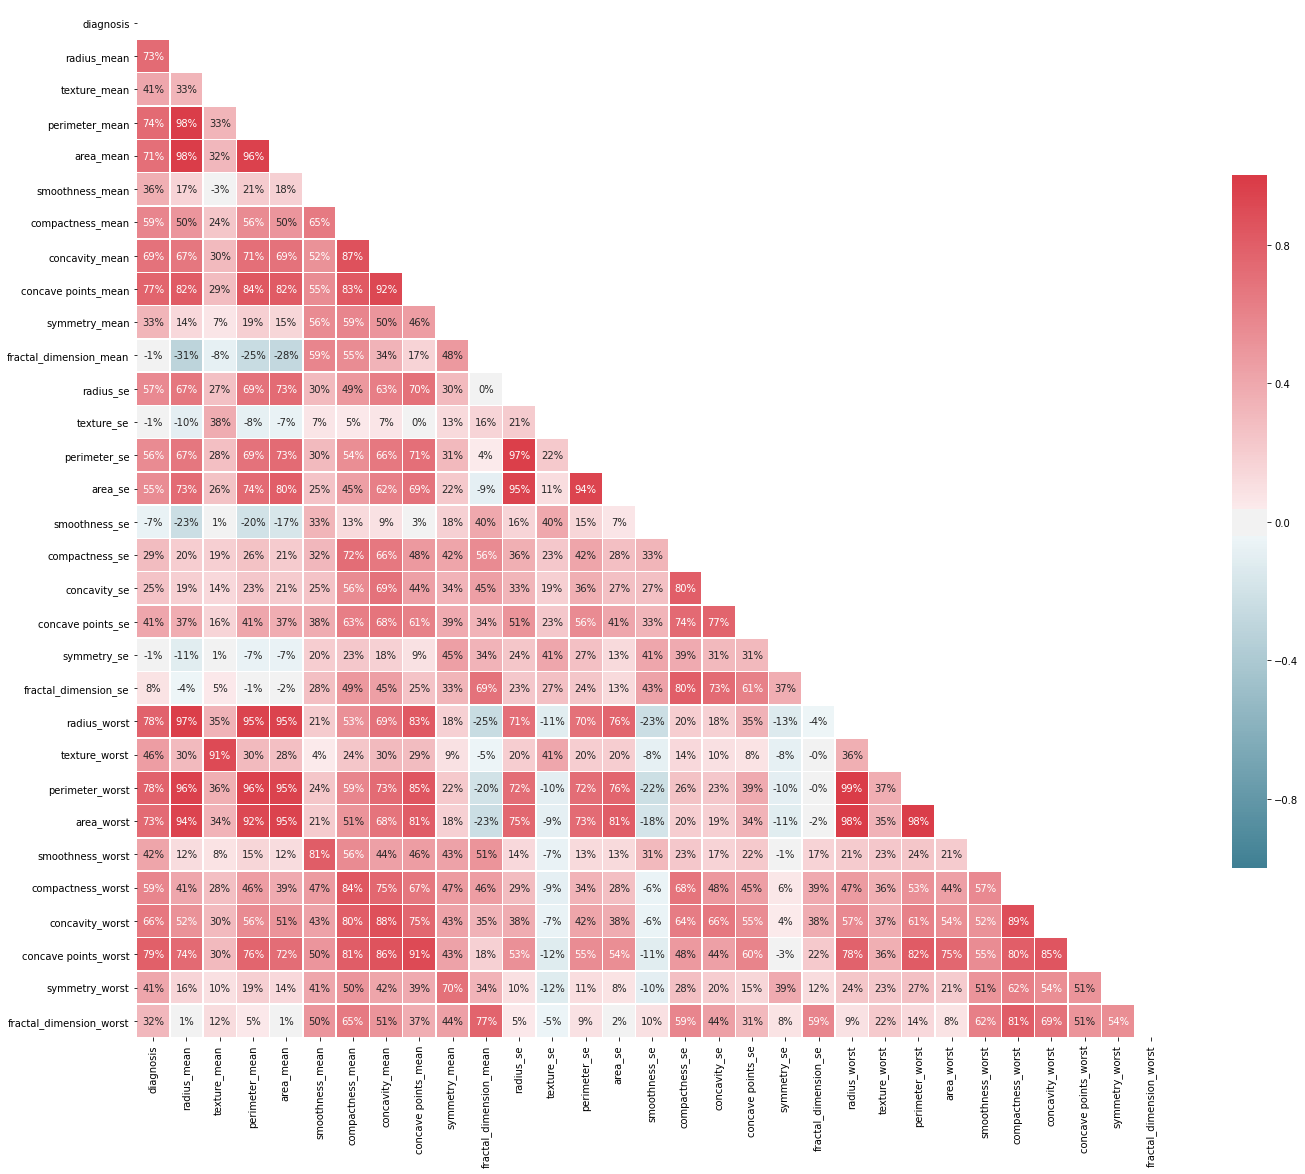

In [44]:
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.0%', annot=True)
plt.tight_layout()

In [17]:
# Find the columns numbers of top 10 features, based on correlation values
features= ['concave points_worst','area_worst','perimeter_worst','radius_worst','concave points_mean','concavity_mean','area_mean','perimeter_mean','radius_mean']
t=[]
for i in range (9):
    print(df.columns.get_loc(features[i]) )

28
24
23
21
8
7
4
3
1


In [18]:
Y= df.iloc[:,0:1]
X= df.iloc[:,[1,3,4,7,8,21,23,24,28]]
print(X,Y)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.30 , random_state=0)
stndrdsc = StandardScaler()
X_train = stndrdsc.fit_transform(X_train)
X_test = stndrdsc.fit_transform(X_test)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)    

     radius_mean  perimeter_mean  area_mean  concavity_mean  \
0      14.121096          122.80     1001.0         0.30010   
1      20.570000          132.90     1326.0         0.08690   
2      19.690000          130.00     1203.0         0.19740   
3      11.420000           77.58      386.1         0.24140   
4      20.290000          135.10     1297.0         0.19800   
..           ...             ...        ...             ...   
564    21.560000          142.00     1479.0         0.24390   
565    20.130000          131.20     1261.0         0.14400   
566    16.600000          108.30      858.1         0.09251   
567    20.600000          140.10     1265.0         0.35140   
568     7.760000           47.92      181.0         0.00000   

     concave points_mean  radius_worst  perimeter_worst  area_worst  \
0                0.14710        25.380           184.60      2019.0   
1                0.07017        24.990           158.80      1956.0   
2                0.12790      

In [19]:
def mod1 (X_train, Y_train):
    LR= LogisticRegression(random_state =0)
    LR.fit(X_train, Y_train)
    
    DTree= DecisionTreeClassifier(criterion = 'entropy' , random_state=0)
    DTree.fit(X_train , Y_train)
    print('Logistic Regression Train Accuracy : ', LR.score(X_train, Y_train))
    print('Logistic Regression  TEST Accuracy : ', LR.score(X_test, Y_test))
    print('Decision Tree ------Train Accuracy : ', DTree.score(X_train, Y_train))
    print('Decision Tree -------TEST Accuracy : ', DTree.score(X_test, Y_test))
    return LR , DTree

In [20]:
print(Y_test)
yt=Y_test

     diagnosis
512          1
457          0
439          0
298          0
37           0
..         ...
7            1
408          1
523          0
361          0
553          0

[171 rows x 1 columns]


 Accuracy Results  of Logistic Regression And Decision Tree

In [21]:
mod1=  mod1 (X_train , Y_train)

Logistic Regression Train Accuracy :  0.9422110552763819
Logistic Regression  TEST Accuracy :  0.935672514619883
Decision Tree ------Train Accuracy :  1.0
Decision Tree -------TEST Accuracy :  0.935672514619883


C:\Users\faramarz z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\faramarz z\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
def cof12(): #calculate Accuracy for logistic Regression
    for i in range (1):
       
        t=['Logistic Regression' ]
        conf1=confusion_matrix(Y_test , mod1[0].predict(X_test))
        fn=conf1[1][0]
        fp=conf1[0][1]
        tp=conf1[0][0]
        tn=conf1[1][1]
        print(t[i])
        print('confusion matrix is :',conf1)
        print('Test Accuracy is ((tn+tp)/(tp+tn+fp+fn)):',(tn+tp)/(tp+tn+fp+fn)) 
        print()

In [37]:
def cof13(): #calculate Accuracy for Decision Tree
    for i in range (1):
       
        t=['Decision Tree']
        conf1=confusion_matrix(Y_test , mod1[1].predict(X_test))
        fn=conf1[1][0]
        fp=conf1[0][1]
        tp=conf1[0][0]
        tn=conf1[1][1]
        print(t[i])
        print('confusion matrix is :',conf1)
        print('Test Accuracy is ((tn+tp)/(tp+tn+fp+fn)):',(tn+tp)/(tp+tn+fp+fn)) 
        print()

In [38]:
cof12()

Logistic Regression
confusion matrix is : [[105   3]
 [  8  55]]
Test Accuracy is ((tn+tp)/(tp+tn+fp+fn)): 0.935672514619883



In [39]:
cof13()

Decision Tree
confusion matrix is : [[98 10]
 [ 1 62]]
Test Accuracy is ((tn+tp)/(tp+tn+fp+fn)): 0.935672514619883



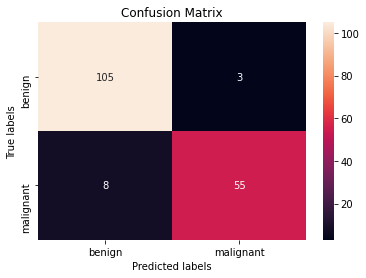

In [42]:
conf1=confusion_matrix(Y_test , mod1[0].predict(X_test))
ax= plt.subplot()
sns.heatmap(conf1, annot=True, ax=ax, fmt="d"); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['benign','malignant' ]); ax.yaxis.set_ticklabels(['benign','malignant'])
plt.show()

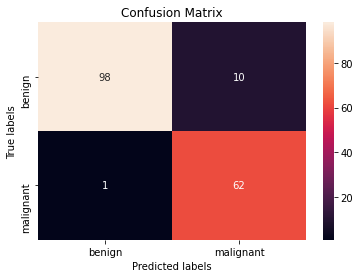

In [43]:
conf1=confusion_matrix(Y_test , mod1[1].predict(X_test))
ax= plt.subplot()
sns.heatmap(conf1, annot=True, ax=ax, fmt="d"); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['benign','malignant']); ax.yaxis.set_ticklabels(['benign','malignant'])
plt.show()